In [1]:
import pandas as pd
import sklearn 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import feature_selection
import seaborn as sns

In [2]:
#Fundo a ser analisado
nome_da_base = 'pagaya'
col_fundos = ['Pagaya Opportunity Fund','Riverview ALF']
nome_benchmark = "IBOXHY Index"

In [3]:
df=pd.read_csv('P:\\ciencia_de_dados\\Correlacao_de_fundos\\Desenvolvimento\\1DataPrep\\base_'+ nome_da_base + '.csv',sep =';',decimal=',',index_col=0)

In [4]:
df_mensal = pd.read_csv('P:\\ciencia_de_dados\\Correlacao_de_fundos\\Desenvolvimento\\1DataPrep\\base_'+ nome_benchmark + '.csv',sep =';',index_col=0,decimal=',')

In [5]:
df = pd.concat([df_mensal, df])

In [6]:
df_sub = df.pivot(index=["data","Ano","Mes"], columns="Product", values="Retorno")
df_sub = df_sub.reset_index()
df_sub=df_sub.dropna()

In [7]:
df_sub.head()

Product,data,Ano,Mes,IBOXHY Index,Pagaya Opportunity Fund,Riverview ALF
9,2018-09-28,2018,9,0.323904,0.660002,0.120008
10,2018-10-31,2018,10,-1.124030,0.779998,0.609267
11,2018-11-30,2018,11,-0.843012,0.619996,0.555944
12,2018-12-31,2018,12,2.045906,0.709999,0.533128
13,2019-01-31,2019,1,1.620364,0.609994,0.500834


In [17]:
def show_graph_reg(x,y,regr):
    # plot it as in the example at http://scikit-learn.org/
    plt.scatter(x, y,  color='black')
    plt.plot(x, regr.predict(x), color='blue', linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.show()
                  

In [16]:
def regressao_linear(df,nome_do_fundo,nome_benchmark):   
    df_fundo = df.loc[df.Product == nome_do_fundo,['data','Retorno']]
    df_bench = df.loc[df.Product == nome_benchmark,['data','Retorno']]

    df_fundo.index = df_fundo['data']
    df_bench.index = df_bench['data']
    df_join =pd.merge(df_bench, df_fundo,how='inner',left_index=True, right_index=True).dropna()[['Retorno_x','Retorno_y']]

    #Regressao Linear total
    x = (df_join['Retorno_x']).values.reshape((-1, 1))
    y= (df_join['Retorno_y']).values.reshape((-1, 1))
    
    regr = sklearn.linear_model.LinearRegression()
    regr.fit(x, y)
    show_graph_reg(x,y,regr)
    return regr.coef_[0][0],regr.intercept_[0],regr.score(x, y)



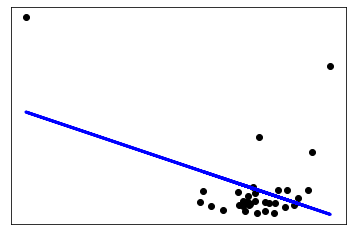

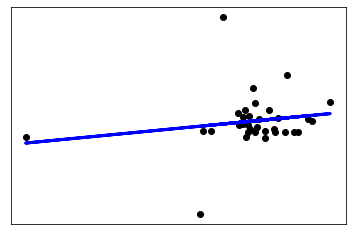

In [18]:
k=0
v = []
for i in col_fundos:
    v.append(regressao_linear(df,i,nome_benchmark))


In [11]:
pd.DataFrame(v,index=col_fundos).rename(columns = {0:'Beta',1:'Alpha',2:'R^2'}).T

,Pagaya Opportunity Fund,Riverview ALF
Beta,-0.111548,0.208695
Alpha,0.871952,1.173805
R^2,0.167101,0.029297


(0.208694907529525, 1.1738045451693604, 0.02929689036393457)

Regressao Linear 

In [13]:
# The coefficients
print('Beta: \n', regr.coef_)
print('Alpha: \n',regr.intercept_)
#Score R^2
print('R^2: \n',regr.score(x, y))
# The mean squared error
print('Mean squared error: %.8f' % sklearn.metrics.mean_squared_error(x, regr.predict(x)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.8f' % sklearn.metrics.r2_score(x, regr.predict(x)))

Beta: 
 [[0.76137259]]
Alpha: 
 [0.02229696]
R^2: 
 0.8355529765395104
Mean squared error: 0.15091670
Coefficient of determination: 0.94303973


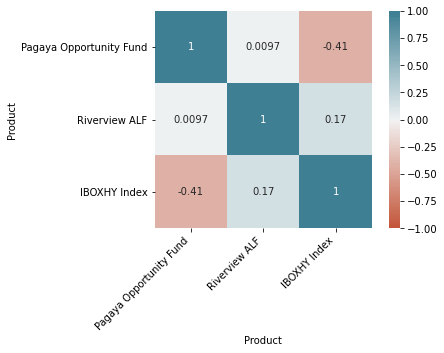

In [68]:
col_fundos.append(nome_benchmark)
corr = df_sub[col_fundos].corr()
ax = sns.heatmap(
    corr,
    annot=True, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Regressao Linear Up /Down Capture  file:///P:/ciencia_de_dados/Correlacao_de_fundos/Relatorios/SSRN-id3024136.pdf

In [15]:
#Seleciona os bpontos onde o benchmark eh positivo
df_join_up_capture = df_join[df_join['Retorno_x'] > 1]
#df_join_up_capture.index.strftime('%Y').unique()
df_join_up_capture["Retorno_x"] = df_join_up_capture["Retorno_x"] + 1
df_join_up_capture["Retorno_y"] = df_join_up_capture["Retorno_y"] + 1

retorno_anualizado_up = (df_join_up_capture["Retorno_y"].product()**(252/float(df_join_up_capture['Retorno_y'].count())) - 1) * 100
retorno_anualizado_up_bench = (df_join_up_capture["Retorno_x"].product()**(252/float(df_join_up_capture['Retorno_x'].count())) - 1) * 100

upside_capture_radio = ((retorno_anualizado_up-1)/(retorno_anualizado_up_bench-1))
upside_capture_radio

C:\Users\carol\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\carol\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


3.167136503930928e-30

In [9]:
#Seleciona os bpontos onde o benchmark eh positivo
df_join_down_capture = df_join[df_join['Retorno_x'] <= 1]


df_join_down_capture
n_down = float(df_join_down_capture['Retorno_y'].count())

retorno_medio_total_fundo = ((df_join_down_capture['Retorno_y']).product()) ** (1/n_down)
retorno_medio_total_bench = ((df_join_down_capture['Retorno_x']).product()) ** (1/n_down)

upside_capture_radio = (retorno_medio_total_fundo - 1 )/(retorno_medio_total_bench - 1)*100
upside_capture_radio

100.0

Mutual Information para variavel continua
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html

In [17]:
#Multual Information(Entropia)
sklearn.feature_selection.mutual_info_regression(x,df_join['Retorno_y']-1)

array([1.00034907])

Correlacao de Pearson